<a href="https://colab.research.google.com/github/alexisf125/alexisf125/blob/main/1_C51_PS2_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving efficiency_train.csv to efficiency_train.csv
Saving efficiency_test.csv to efficiency_test.csv
Saving bike_train.csv to bike_train.csv
Saving bike_test.csv to bike_test.csv


In [3]:
import pandas as pd
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F


# Load the bike rental data
bike_train = pd.read_csv('bike_train.csv')
bike_test = pd.read_csv('bike_test.csv')

# one hot encode Seasons and Holiday
bike_train = pd.get_dummies(bike_train, columns=['Seasons', 'Holiday'])
bike_test = pd.get_dummies(bike_test, columns=['Seasons', 'Holiday'])

# Preprocess the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = bike_train.drop(['Rented Bike Count', 'Date'], axis=1).values
X_train = scaler.fit_transform(X_train)
y_train = bike_train['Rented Bike Count'].values.reshape(-1, 1)
X_test = bike_test.drop(['Rented Bike Count', 'Date'], axis=1).values
X_test = scaler.fit_transform(X_test)
y_test = bike_test['Rented Bike Count'].values.reshape(-1, 1)

# Define the dataset
class BikeData(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# convert test data
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

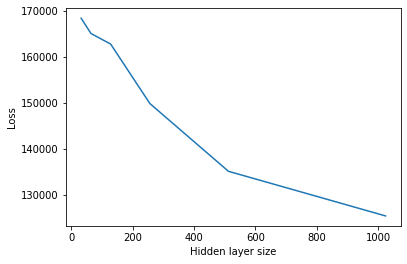

In [4]:
# Single hidden layer with ReLU activation function
class BikeModel1(nn.Module):
    def __init__(self, input_size, hidden_size, activation):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# iteratre over different hidden layer sizes to minimize the loss
hidden = [32, 64, 128, 256, 512, 1024]
layer_size_loss = []
for hidden_size in hidden:
    model = BikeModel1(X_train.shape[1], hidden_size, F.relu)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # convert training data
    train_data = BikeData(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

    # train the model
    for epoch in range(100):
        for X, y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # evaluate the model
    y_pred = model(X_test_tensor)
    loss = criterion(y_pred, y_test_tensor)
    layer_size_loss.append(loss.item())

# plot the loss for different hidden layer sizes
import matplotlib.pyplot as plt
plt.plot(hidden, layer_size_loss)
plt.xlabel('Hidden layer size')
plt.ylabel('Loss')
plt.show()

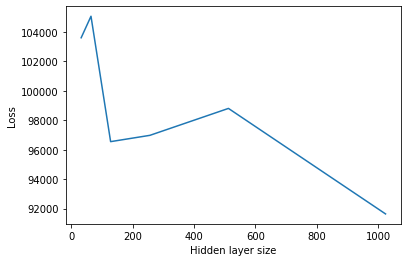

In [5]:
# Mulitple hidden layers with ReLU activation function
class BikeModel2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, activation):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

# iteratre over different hidden layer sizes to minimize the loss
hidden = [32, 64, 128, 256, 512, 1024]
layer_size_loss = []
for hidden_size in hidden:
    model = BikeModel2(X_train.shape[1], hidden_size, hidden_size, hidden_size, 1, F.relu)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # convert training data
    train_data = BikeData(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

    # train the model
    for epoch in range(100):
        for X, y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # evaluate the model
    y_pred = model(X_test_tensor)
    loss = criterion(y_pred, y_test_tensor)
    layer_size_loss.append(loss.item())

# plot the loss for different hidden layer sizes
import matplotlib.pyplot as plt
plt.plot(hidden, layer_size_loss)
plt.xlabel('Hidden layer size')
plt.ylabel('Loss')
plt.show()


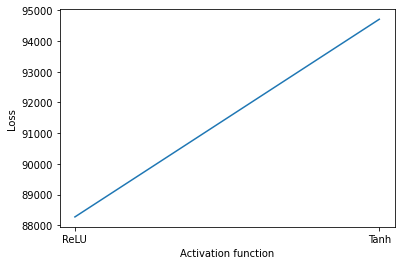

In [6]:
# Mulitple hidden layers with different activation functions (ReLU and Tanh)
class BikeModel3(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# compare the loss for different activation functions
activation = [F.relu, torch.tanh]
activation_loss = []
for activation_function in activation:
    model = BikeModel3(X_train.shape[1], 1024, 1024)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # convert training data
    train_data = BikeData(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

    # train the model
    for epoch in range(100):
        for X, y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # evaluate the model
    y_pred = model(X_test_tensor)
    loss = criterion(y_pred, y_test_tensor)
    activation_loss.append(loss.item())

# plot the loss for different activation functions
import matplotlib.pyplot as plt
plt.plot(['ReLU', 'Tanh'], activation_loss)
plt.xlabel('Activation function')
plt.ylabel('Loss')
plt.show()